Minimum CPU Load: 27.2 Maximum CPU Load:  62.85


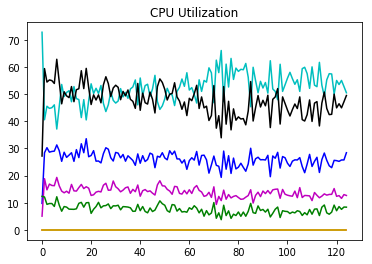

In [1]:
import matplotlib.pyplot as plt
import numpy as np

f = open('iostat.log','r')
w = open('wlog','w')
imp = ''
for line in f:
    if 'avg-cpu:' in line or 'Linux' in line or 'Device' in line or 'nvme' in line:
        continue
    imp += line
    
w.writelines(imp)
w.close()
cols=[0,1,2,3,4,5]
f = np.genfromtxt('wlog',delimiter='',autostrip=True,usecols=cols)
user = []
nice = []
sys = []
iow = []
stl = []
idle = []
curr = []

for x in f:
    tot = 0
    tus = x[0]
    tnc = x[1]
    tsy = x[2]
    tio = x[3]
    tsl = x[4]
    tdl = x[5]
    tot += tus+tsy+tnc+tio+tsl
    user.append(tus)
    nice.append(tnc)
    sys.append(tsy)
    iow.append(tio)
    stl.append(tsl)
    idle.append(tdl)
    curr.append(tot)

mincpu = min(curr)
maxcpu = max(curr)

print('Minimum CPU Load:',mincpu,'Maximum CPU Load: ',maxcpu)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title("CPU Utilization") 
x = np.linspace(-100,100,1000)
y1 = np.array(user)
y2 = np.array(nice)
y3 = np.array(sys)
y4 = np.array(iow)
y5 = np.array(stl)
y6 = np.array(idle)
y = np.array(curr)
plt.plot(y1,c='b',label='User')
plt.plot(y2,c='r',label='Nice')
plt.plot(y3,c='m',label='System')
plt.plot(y4,c='g',label='IO Wait Time')
plt.plot(y5,c='y',label='Steal')
plt.plot(y6,c='c',label='Idle')
plt.plot(y,c='k',label="CPU load")
plt.plot
plt.show()
plt.close('all')

